In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, beta
from math import comb
import pymc3 as pm
import arviz as az

# Problem 1

In [9]:
def bernoulli_sampling(p, n):
    """
    Simulate n tosses of a coin which gives heads with probability 
    p. Then use that sample to calculate the posterior distribution on 
    p given a uniform prior.

    Parameters:
        p (float): probability of a successful bernoulli trial
        n (int): number of bernoulli trials to simulate

    Returns:
        (float): The MAP estimate of p
    """
    draw = binom.rvs(n,p)
    p_vals = np.linspace(0,1,n)
    likelihood = np.array([binom.pmf(draw, n, p) for p in p_vals])
    post_dict = likelihood / sum(likelihood)
    plt.plot(p_vals, post_dict)
    plt.show()
    return p_vals[np.argmax(post_dict)]

# Problem 2

In [12]:
def non_uniform_prior(p, n, prior):
    """
    Generate a sample of size n that has a Bernoulli
    distribution with a probability parameter p.
    Use Bayes' theorem to compute the posterior distribution
    for the given prior and the generated sample:
    
        P(t|x) = P(x|t) P(t) / P(x)
    
    Plot both prior and posterior distributions between [0, 1]

    Parameters:
        p (float): probability of a successful bernoulli trial
        n (int): number of bernoulli trials to simulate
        prior (scipy dist): the prior distribution on p

    Returns:
        (float): MAP estimate
    """
    draw = binom.rvs(n,p)
    p_vals = np.linspace(0,1,n)
    likelihood = np.array([binom.pmf(draw, n, p) for p in p_vals])
    prior_dist = np.array([prior.pdf(p) for p in p_vals])
    post_dist = likelihood*prior_dist / sum(likelihood*prior_dist)

    plt.plot(p_vals, post_dist)
    plt.show()

    return p_vals[np.argmax(post_dist)]

# Problem 3

In [15]:
def weather_forecast(transition_matrix, days=10):
    """
    Given the above transition matrix and assuming the 0th day is sunny,
    sample from the markov chain to give a possible forecast of the 10 following
    days. 
    """
    days_list = ['sun', 'rain', 'wind']
    visited = []
    curr_day = 'sun'
    for d in range(days):
        curr_day = np.random.choice(days_list, p = transition_matrix[days_list.index(curr_day)])
        visited.append(curr_day)

    return visited

In [16]:
transition_matrix = np.array(
  [
    [0.6,0.1,0.3],
    [0.2,0.6,0.2],
    [0.3,0.4,0.3]
  ]
)

print(weather_forecast(transition_matrix))

['wind', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'wind', 'wind']


# Problem 4

In [31]:
def posterior_sampling(data, n=1000):
    """
    Given data that flips a coin 100 times, assume the data are distributed 
    as Bernoulli(p) for some unknown value of p, where p has a prior of 
    Beta(1,1). Set up a PyMC3 model for this situation and sample from the 
    poterior n times. Print a trace plot. Return the mean for the posterior.
    
    Parameters:
        data (array): The coin flips
        n (int): number of samples to take from the posterior
        
    Returns:
        Mean (float): The average of the coin flips (estimated p)
    """
    model = pm.Model()
    with model:
        lam = pm.Beta('lambda', alpha=1, beta=1)
        pm.Bernoulli('y', p=lam, observed=data)
        trace = pm.sample(n) #n is the desired number of samples
        az.plot_trace(trace)
        lam = trace['lambda']
        mean = lam.mean()
    
    return mean


/var/folders/j0/dm4fbfs97z932w8fw8c3cvqc0000gn/T/ipykernel_15470/2811272822.py:19: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n) #n is the desired number of samples
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


0.18834238431739905

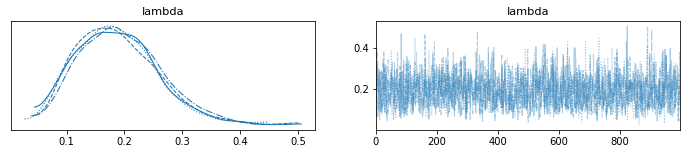

In [32]:
data = bernoulli.rvs(0.2, size=30)
posterior_sampling(data)

# Problem 5

In [33]:
def height_model(observed_heights,m=180,s=10,alpha=2,beta=10,n=1000):

    """
    Given a dataset of the measured heights of 100 men, assume the data are
    distributed as Normal(mu,1/tau) where mu has a prior of Normal(m,s), and tau has
    a prior of Gamma(alpha,beta). Set up a PyMC3 model for this situation and sample 
    from the poterior n times. Print a trace plot for mu and tau. Return the mean 
    for the posterior of mu.
    
    Parameters:
        observed_heights (array): The measured heights of 100 men
        m (int): the mean in the prior distribution of mu
        s (int): the standard deviation in the prior distribution of mu
        alpha (int): the first component in the prior distibution of tau
        beta (int): the second component in the prior distribution of tau
        n (int): number of samples from the posterior
        
    Returns:
        mu_mean (float): the estimated value of mu
    """
    model = pm.Model()
    with model:
        m = pm.Normal("mu", mu = m, sigma=s)
        t = pm .Gamma("tau", alpha = alpha, beta = beta)
        pm.Normal('y', mu = m, sigma = 1/t, observed = observed_heights)
        trace = pm.sample(n)
        az.plot_trace(trace)
        m = trace["mu"]
        mean = m.mean()
    return mean

    


/var/folders/j0/dm4fbfs97z932w8fw8c3cvqc0000gn/T/ipykernel_15470/2565983487.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


179.59515988336366

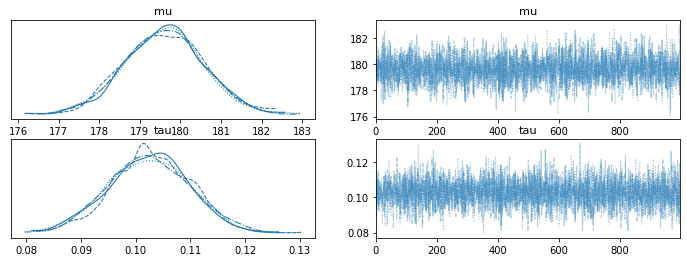

In [35]:
heights = np.random.normal(180,10,100)
height_model(heights)